### Twitter Sentiment Prediction

1. Introduction

    Taking a look at twitter, there are a lot of tweets generated every single second by different users. In addition, some of these tweets might be positive while the others might be negative. It would be really useful if machine learning and deep learning is deployed in real-time to classify the texts and tweets as positive, negative or neutral respectively. As a result of this, a lot of time and money would be saved by the company without the need to use manpower for these simple tasks respectively.

    In this machine learning project, we would be working with real-time twitter tweets and predicting the sentiment of the text whether it is positive, negative or neutral. With the help of deep neural networks along with hyperparameter tuning, we would be classifying the tweets, ensuring that there is a good business value for the company by analyzing the text and understanding the working of machine learning models.

##### The dataset is taken from Kaggle. It is available in the website below. Feel free to download the dataset.

https://www.kaggle.com/c/tweet-sentiment-extraction/data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
# We would be dropping the selected text as the test set does not contain those values. 
# It would be good to leave only the text for the machine learning models for predictions respectively.

df.drop(['selected_text'], axis = 1, inplace = True)

In [6]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


2. Countplot of the Sentiment

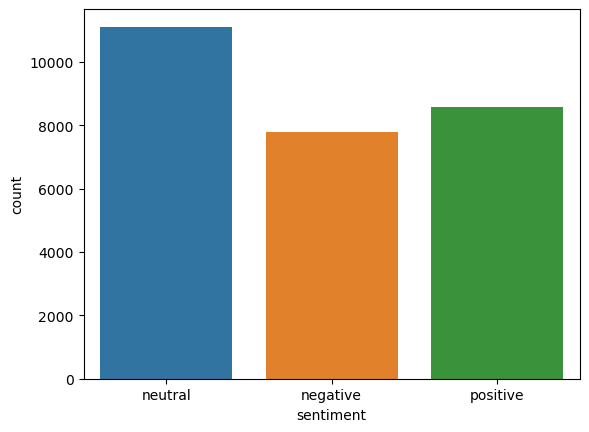

In [7]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

In [8]:
df.shape

(27481, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [10]:
# We see that almost all the values are not-null except a few 
# we will clear them to ensure that those values don't interfere in the analysis or predictions 

df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27480 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


In [12]:
df['text_length'] = df['text'].apply(lambda x: len(x))


In [13]:
df.head()

,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [15]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [16]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [17]:
df.tail()

,textID,text,sentiment,text_length,text_words
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative,77,16
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative,122,23
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive,111,22
27479,ed167662a5,But it was worth it ****.,positive,27,6
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,neutral,62,11


In [22]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['text'].iloc[i], float) == True:
        print(df['text'].iloc[i])

In [18]:

positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [19]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))


The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [20]:
wordcloud = WordCloud(width = 500, height = 500)


3. Positive Text WordCloud

    Worcloud gives us a good idea about the number of repeating words by the size of them. We see that there are some positive words such as "thank" and "good "which make up most of the positive reviews. There are also some words that occur quite rare such as "awesome" but these words also make a mark in the decisions respectively. In addition to this, we also find that there are very few words that are negative in the positive text. Therefore, we can conclude that words are a good indication of the polarity and sentiment of the text respectively.


In [21]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

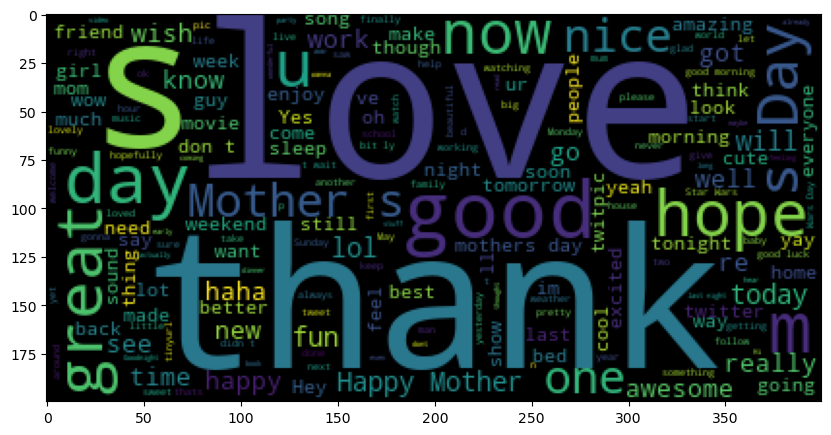

In [24]:
wordcloud = WordCloud(stopwords = STOPWORDS)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()


4. Negative Text WordCloud

    As can be seen in the wordcloud, there are some words such as "miss" and "no" which are considered to be negative respectively. In addition to this, we see that there are some words such as "work" and "sorry" that also tend to be negative as this is quite true in real-life where we say "sorry" for some negative things done and so on. Therefore, getting the wordcloud would ensure that we get to know the words present in the wordcloud dictionary and ensure that we understand the full context of the review respectively.


In [25]:
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

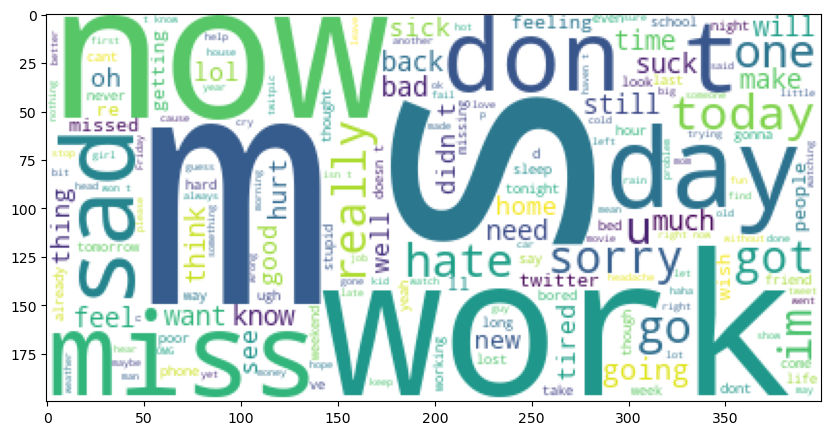

In [27]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [28]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [29]:
df.drop(['textID'], axis = 1, inplace = True)


In [30]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

5. Dividing the Data into Training and Cross Validation Data

In [31]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
X_train.shape

(19236, 3)

In [33]:
y_train.shape

(19236,)

In [36]:
X_cv.shape

(8244, 3)

6. Function for Replacing Words

In [37]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

7. Preprocessing the Text

In [38]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 19236/19236 [00:00<00:00, 51446.33it/s]


In [39]:
preprocessed_text[0: 5]

['morning loads 2day goin walk 1st get rid last nites haribo',
 'know sprain repetitive injury',
 'besties twitpic http twitpic com 67hac besties http twitpic com 67hac',
 'checked worked sorry',
 'no u guys said california angry tweet perez hilton jonathan upset spelled california wrong']

In [40]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

In [41]:
X_train.head()

,text,text_length,text_words
21912,morning loads 2day goin walk 1st get rid last ...,88,19
24541,know sprain repetitive injury,60,12
26263,besties twitpic http twitpic com 67hac besties...,120,16
22394,checked worked sorry,41,7
27323,no u guys said california angry tweet perez hi...,112,20


In [42]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 8244/8244 [00:00<00:00, 49279.14it/s]


In [43]:
preprocessed_text[0: 5]

['enjoy family trumps everything',
 'kinda turns buy dig deeper hole etc',
 'clive birthday pat http apps facebook com dogbook profile view 6386106',
 'congrats hey',
 'texting']

In [44]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

In [45]:
X_cv.head()

,text,text_length,text_words
1589,enjoy family trumps everything,32,4
10414,kinda turns buy dig deeper hole etc,100,23
6562,clive birthday pat http apps facebook com dogb...,84,7
2603,congrats hey,13,2
4004,texting,10,2


In [46]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [47]:
y_cv_converted

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])


9. Tfidf Vectorizer

    With the help of Tfidf Vectorizer, it is easy to convert the text into the form of vector based on the word frequency and the inverse document frequency and get those values which could be fed to the machine learning models for prediction respectively. Having a look at those values, we are going to be taking them and predicting using the machine learning approach.


In [48]:
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])

In [49]:
X_train_text.shape

(19236, 20802)

In [54]:
X_train_text[0:1]

<1x20802 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

10. Neural Network Model 

In [55]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [56]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [57]:
y_train

21912     neutral
24541    negative
26263     neutral
22394     neutral
27323    negative
           ...   
21576     neutral
5391      neutral
861       neutral
15796    positive
23655    positive
Name: sentiment, Length: 19236, dtype: object

In [58]:
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)

In [59]:
y_train_converted


array([1, 0, 1, ..., 1, 2, 2])

In [60]:
y_train_final = to_categorical(y_train_converted)

In [61]:
X_train.head()


,text,text_length,text_words
21912,morning loads 2day goin walk 1st get rid last ...,88,19
24541,know sprain repetitive injury,60,12
26263,besties twitpic http twitpic com 67hac besties...,120,16
22394,checked worked sorry,41,7
27323,no u guys said california angry tweet perez hi...,112,20


In [62]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [63]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [64]:
X_train_dropped.head()

,text_length,text_words
21912,88,19
24541,60,12
26263,120,16
22394,41,7
27323,112,20


In [65]:
X_cv.head()

,text,text_length,text_words
1589,enjoy family trumps everything,32,4
10414,kinda turns buy dig deeper hole etc,100,23
6562,clive birthday pat http apps facebook com dogb...,84,7
2603,congrats hey,13,2
4004,texting,10,2


In [67]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)

In [68]:
X_cv_dropped.head()

,text_length,text_words
1589,32,4
10414,100,23
6562,84,7
2603,13,2
4004,10,2


In [69]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [70]:
X_train_final[0: 5]


array([[0.61594203, 0.5625    ],
       [0.41304348, 0.34375   ],
       [0.84782609, 0.46875   ],
       [0.27536232, 0.1875    ],
       [0.78985507, 0.59375   ]])

In [71]:
X_cv_final[0: 5]

array([[0.21014493, 0.09375   ],
       [0.70289855, 0.6875    ],
       [0.58695652, 0.1875    ],
       [0.07246377, 0.03125   ],
       [0.05072464, 0.03125   ]])

In [72]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [73]:
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)

In [74]:
y_train_final[0: 5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [75]:
y_cv_final[0: 5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [76]:
X_train_final[0: 5]

array([[0.61594203, 0.5625    ],
       [0.41304348, 0.34375   ],
       [0.84782609, 0.46875   ],
       [0.27536232, 0.1875    ],
       [0.78985507, 0.59375   ]])

In [78]:

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])



In [79]:
X_train_vectorized

<19236x20802 sparse matrix of type '<class 'numpy.int64'>'
	with 136109 stored elements in Compressed Sparse Row format>

In [80]:
X_train_final[0: 5]

array([[0.61594203, 0.5625    ],
       [0.41304348, 0.34375   ],
       [0.84782609, 0.46875   ],
       [0.27536232, 0.1875    ],
       [0.78985507, 0.59375   ]])

In [81]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

In [83]:

X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

In [84]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [85]:
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))


Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4676 - loss: 1.0194 - val_accuracy: 0.6857 - val_loss: 0.7694
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7054 - loss: 0.7115 - val_accuracy: 0.6874 - val_loss: 0.7346
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8116 - loss: 0.5100 - val_accuracy: 0.6805 - val_loss: 0.7788
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8599 - loss: 0.3828 - val_accuracy: 0.6762 - val_loss: 0.8699
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9009 - loss: 0.2796 - val_accuracy: 0.6735 - val_loss: 1.0260
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9214 - loss: 0.2262 - val_accuracy: 0.6713 - val_loss: 1.1503
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9317 - loss: 0.1912 - val_accuracy: 0.6672 - val_loss: 1.2860
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9462 - loss: 0.1526 - val_accuracy: 0.

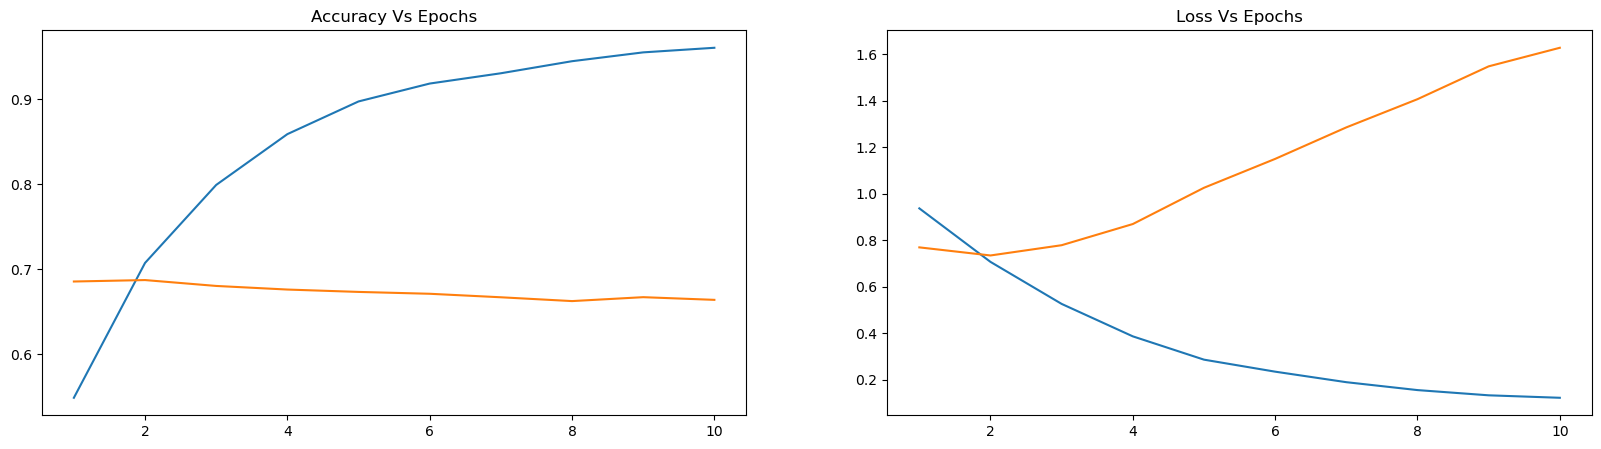

In [86]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.lineplot(x = epochs, y = accuracy, ax = ax[0])
sns.lineplot(x = epochs, y = val_accuracy, ax = ax[0])
ax[0].set_title('Accuracy Vs Epochs')
sns.lineplot(x = epochs, y = loss, ax = ax[1])
sns.lineplot(x = epochs, y = val_loss, ax = ax[1])
ax[1].set_title('Loss Vs Epochs')
plt.show()


#### Conclusions

1. It would be a good idea to use some tools such as wordcloud when we are doing Natural Language Processing (NLP) to ensure that we are getting the best results for predictions respectively. We would be able to understand the frequently occurring words from the less frequently occurring words by the size of the words that are plotted in the wordcloud respectively.

2. Steps should be taken to ensure that the model does not overfit or underfit. This ensures that the best predictions are being generated and therefore, we are going to get the best outputs respectively.

3. Standarizing the text and ensuring that the values lie between 0 and 1 would be good as this would allow the machine learning models to generate weights that are quite small rather than having different weight range values.

